In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import metrics

# Decision Tree 
### Decision Tree is a tree shaped diagram and rule-based approach used to determine a course of action. Each branch of the tree represents a possible decision, occurrence or reaction. 
* Classification or Regression
* The decision tree uses the loss function that evaluates the split base on the purity of the resulting nodes. The loss function compares the class distribution before and after the split, such as Gini Impurity and Entropy
    * For the classification problem, it uses Gini Impurity/Entropy
    * For the regression problem, it uses the mean squared error (MSE).
* Advantage
  * Simple to understand, interpret and visualize
  * Little effort required for data preparation
  * Can handle both numerical and categorical data * Non linear parameters don't effect its performance
* Disadvantage
  * Overfitting: Overfitting occurs when the algorithm captures noise in the data
  * High variance: The model can get unstable due to small variation in data
  * Low biased Tree: A high complicated Decision tree tends to have a low bias which makes it difficult for the model to work with new data

### Important Terms 
* Entropy - the measure of randomness or unpredictability in the dataset
* Information Gain - the measure of decrease in entropy after the dataset is split
* Leaf Node - carry the classification or the decision
* Root Node - the top most decision node

"<img src="Image/Decision_Tree3.JPG" width="600" height="300">"

### How does a Decision Tree work?
* We have to frame the conditions that split the data in such a way that the information gain is the highest.

<img src="Image/Decision_Tree4.JPG" width="600" height="300">
<img src="Image/Decision_Tree5.JPG" width="600" height="300">

<table align="left">
    <tr>
        <td><img src="Image/Decision_Tree.JPG" width="300" height="300"><td>
        <td><img src="Image/Decision_Tree2.JPG" width="300" height="300"></td>
    </tr>
</table>

### User Case - Loan Repayment Prediction

### Problem Statement
To predict if a customer will repay loan amount or not using decision tree algorithm

### 1. Importing the libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import metrics

### 2. Loading the dataset and Preprocessing

In [14]:
# class_type is the dependent variable
animal_df = pd.read_csv('Data/zoo.csv').iloc[: , 1:]
animal_df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [15]:
# getting a dictionary to map class_number to class_type
class_df = pd.read_csv('Data/class.csv')[['Class_Number', 'Class_Type']]
class_dic = class_df.to_dict('split')['data']
class_dic = dict(class_dic)
class_dic

{1: 'Mammal',
 2: 'Bird',
 3: 'Reptile',
 4: 'Fish',
 5: 'Amphibian',
 6: 'Bug',
 7: 'Invertebrate'}

In [16]:
# applying map to dependent variable, so now have type name instead of type number
animal_df['class_type'] = animal_df['class_type'].map(lambda x: class_dic.get(x))
animal_df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mammal
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,Mammal
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,Fish
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mammal
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mammal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,Mammal
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,Bug
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mammal
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,Invertebrate


In [17]:
animal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hair        101 non-null    int64 
 1   feathers    101 non-null    int64 
 2   eggs        101 non-null    int64 
 3   milk        101 non-null    int64 
 4   airborne    101 non-null    int64 
 5   aquatic     101 non-null    int64 
 6   predator    101 non-null    int64 
 7   toothed     101 non-null    int64 
 8   backbone    101 non-null    int64 
 9   breathes    101 non-null    int64 
 10  venomous    101 non-null    int64 
 11  fins        101 non-null    int64 
 12  legs        101 non-null    int64 
 13  tail        101 non-null    int64 
 14  domestic    101 non-null    int64 
 15  catsize     101 non-null    int64 
 16  class_type  101 non-null    object
dtypes: int64(16), object(1)
memory usage: 13.5+ KB


### 2. Separating the Target variable

In [18]:
# all features
X = animal_df.iloc[:, :-1]
# selected feature
#X = animal_df.iloc[:, :-1].drop(columns=['milk', 'backbone'])
Y = animal_df.iloc[:, -1]

### 3. Splitting the data into Train and Test set

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=100)

### 4. Fitting Decision Tree Model to training set

In [20]:
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state = 100)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

### 5. Predicting the test set result

In [21]:
y_pred = clf_entropy.predict(X_test)
y_pred

array(['Bird', 'Fish', 'Amphibian', 'Mammal', 'Mammal', 'Amphibian',
       'Mammal', 'Bird', 'Bird', 'Bird', 'Mammal', 'Bug', 'Mammal',
       'Reptile', 'Bug', 'Mammal', 'Fish', 'Mammal', 'Bird', 'Bird',
       'Mammal', 'Mammal', 'Bird', 'Bird', 'Mammal', 'Mammal', 'Bird',
       'Bird', 'Bug', 'Bird', 'Mammal', 'Mammal', 'Mammal', 'Fish',
       'Mammal', 'Mammal', 'Mammal', 'Mammal', 'Mammal', 'Reptile', 'Bug',
       'Fish', 'Mammal', 'Invertebrate', 'Bug', 'Invertebrate', 'Bird',
       'Mammal', 'Mammal', 'Amphibian', 'Mammal'], dtype=object)

### 6. Evaluating the model

In [22]:
score = accuracy_score(y_test,y_pred)

### 7. Confusion Matrix

In [24]:
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[ 3  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0]
 [ 0  0  5  0  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0 23  0]
 [ 0  0  0  1  0  0  2]]


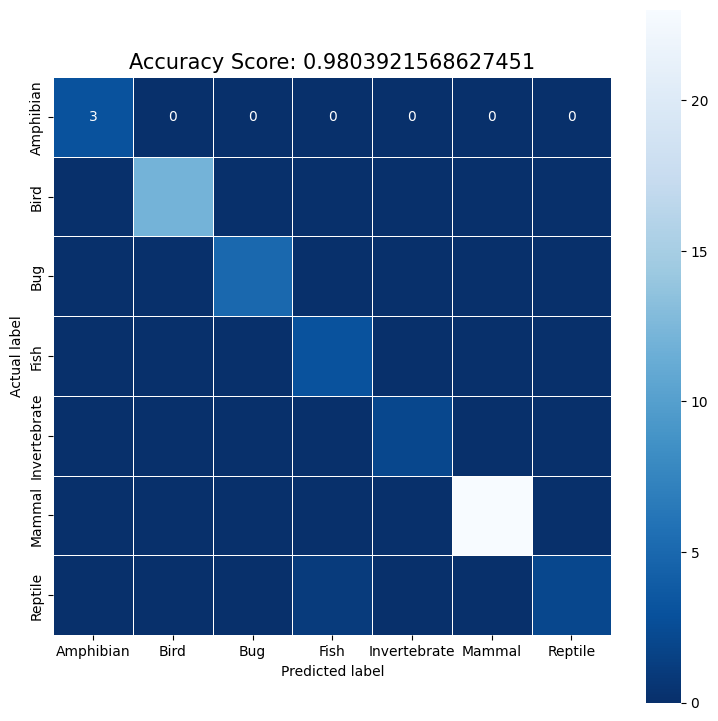

In [28]:
categories = ['Mammal','Bird','Reptile', 'Fish','Amphibian','Bug','Invertebrate']
categories.sort()
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt="d", linewidth=.5, square=True, cmap = "Blues_r",xticklabels=categories,yticklabels=categories)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title = "Accuracy Score: {0}".format(score)
plt.title(all_sample_title,size = 15)
plt.show()

### 7. Plot Decision Tree

In [29]:
# Names of each of the target classes in ascending numerical order
class_names = list(Y.drop_duplicates())
class_names.sort()
class_names

['Amphibian', 'Bird', 'Bug', 'Fish', 'Invertebrate', 'Mammal', 'Reptile']

In [31]:
# Names of each of the features
feature_names = list(X.columns)
feature_names

['hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs',
 'tail',
 'domestic',
 'catsize']

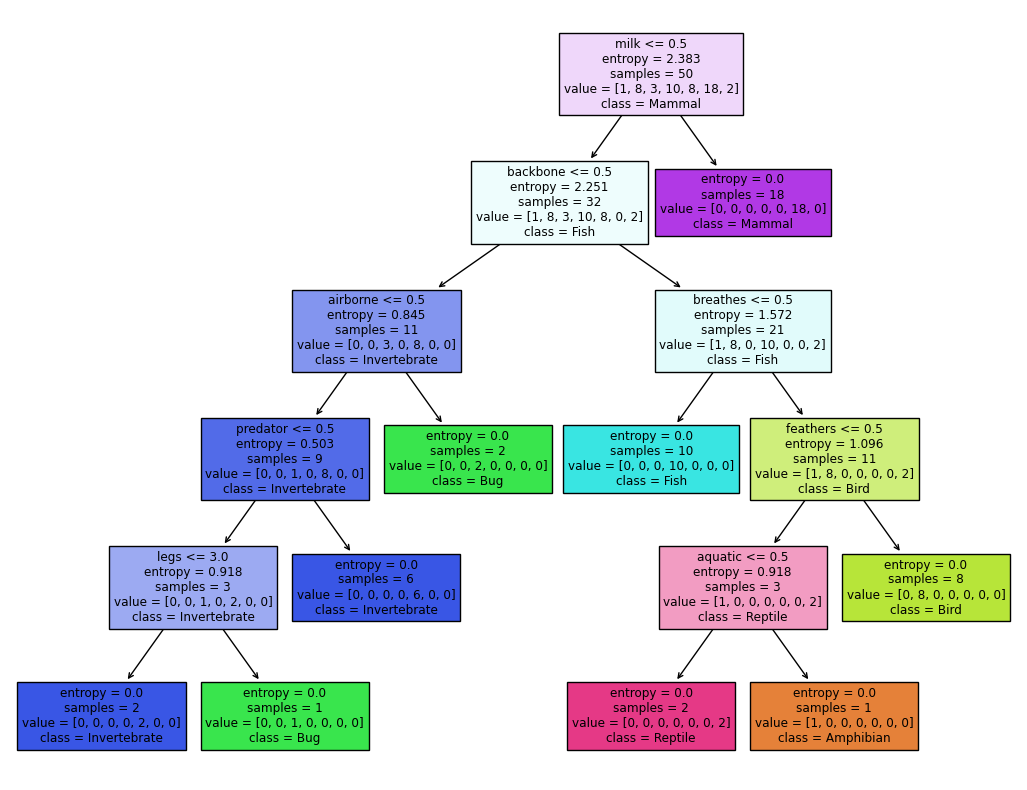

In [32]:
plt.figure(figsize=(13,10))
tree.plot_tree(clf_entropy,filled=True,feature_names=feature_names, class_names=class_names)
plt.show()

In [33]:
print(tree.export_text(clf_entropy,feature_names=feature_names))

|--- milk <= 0.50
|   |--- backbone <= 0.50
|   |   |--- airborne <= 0.50
|   |   |   |--- predator <= 0.50
|   |   |   |   |--- legs <= 3.00
|   |   |   |   |   |--- class: Invertebrate
|   |   |   |   |--- legs >  3.00
|   |   |   |   |   |--- class: Bug
|   |   |   |--- predator >  0.50
|   |   |   |   |--- class: Invertebrate
|   |   |--- airborne >  0.50
|   |   |   |--- class: Bug
|   |--- backbone >  0.50
|   |   |--- breathes <= 0.50
|   |   |   |--- class: Fish
|   |   |--- breathes >  0.50
|   |   |   |--- feathers <= 0.50
|   |   |   |   |--- aquatic <= 0.50
|   |   |   |   |   |--- class: Reptile
|   |   |   |   |--- aquatic >  0.50
|   |   |   |   |   |--- class: Amphibian
|   |   |   |--- feathers >  0.50
|   |   |   |   |--- class: Bird
|--- milk >  0.50
|   |--- class: Mammal

